#**Лабораторная работа № 2**
##Тема: **Классификация** 

15.Датасет DRESSES_ATTRIBUTE_SALES

Задание:
1. Загрузить указанный датасет, содержащий сведения о моделях платьев.
2. Построить модель, которая прогнозирует рекомендацию к покупке платья (столбец 
«Recommendation») на основании данных о свойствах платья. Для оценки качества модели 
использовать метрику Accuracy.
3. Описать выводы и обосновать основные решения (выбор типа модели, гиперпараметров)

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

from category_encoders.target_encoder import TargetEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
data = pd.read_csv(r'dress_sales.csv')

In [235]:
data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


## Fix categorical features

In [236]:
def low(sen):
    try:
        return sen.lower()
    except:
        return np.nan

In [237]:
print(f'Unique Style values before processing: {data.Style.unique()}')

data['Style'] = data['Style'].apply(low)

print(f'Unique Style values after processing: {data.Style.unique()}')

Unique Style values before processing: ['Sexy' 'Casual' 'vintage' 'Brief' 'cute' 'bohemian' 'Novelty' 'Flare'
 'party' 'sexy' 'work' 'OL' 'fashion']
Unique Style values after processing: ['sexy' 'casual' 'vintage' 'brief' 'cute' 'bohemian' 'novelty' 'flare'
 'party' 'work' 'ol' 'fashion']


In [238]:
print(f'Unique Price values before processing: {data.Price.unique()}')

data['Price'] = data['Price'].apply(low)

print(f'Unique Price values after processing: {data.Price.unique()}')

Unique Price values before processing: ['Low' 'High' 'Average' 'Medium' 'very-high' 'low' 'high' nan]
Unique Price values after processing: ['low' 'high' 'average' 'medium' 'very-high' nan]


In [239]:
print(f'Unique Size values before processing: {data.Size.unique()}')

size_fix = {'M':'M',
            'L':'L',
            'XL':'XL',
            'free':'free',
            'S':'S',
            'small':'S',
            's':'S'}

data['Size'] = data['Size'].map(size_fix)
data['Size'] = data['Size'].apply(low)

print(f'Unique Size values after processing: {data.Size.unique()}')

Unique Size values before processing: ['M' 'L' 'XL' 'free' 'S' 'small' 's']
Unique Size values after processing: ['m' 'l' 'xl' 'free' 's']


In [240]:
print(f'Unique Price values before processing: {data.Season.unique()}')

data['Season'] = data['Season'].apply(low)
data['Season'] = data['Season'].replace('automn', 'autumn')

print(f'Unique Price values after processing: {data.Season.unique()}')

Unique Price values before processing: ['Summer' 'Automn' 'Spring' 'Winter' 'spring' 'winter' nan 'summer'
 'Autumn']
Unique Price values after processing: ['summer' 'autumn' 'spring' 'winter' nan]


In [241]:
data['NeckLine'] = data['NeckLine'].apply(low)

In [242]:
print(f'Unique SleeveLength values before processing: {data.SleeveLength.unique()}')

data['SleeveLength'] = data['SleeveLength'].replace('half', 'halfsleeve')
data['SleeveLength'] = data['SleeveLength'].replace('sleevless', 'sleveless')
data['SleeveLength'] = data['SleeveLength'].replace('sleeevless', 'sleveless')
data['SleeveLength'] = data['SleeveLength'].replace('sleeveless', 'sleveless')
# data['SleeveLength'] = data['SleeveLength'].replace('urndowncollor', 'turndowncollor')
# data['SleeveLength'] = data['SleeveLength'].replace('thressqatar', 'threequarter')
data['SleeveLength'] = data['SleeveLength'].replace('cap-sleeves', 'capsleeves')

data['SleeveLength'] = data['SleeveLength'].apply(low)

print(f'Unique SleeveLength values after processing: {data.SleeveLength.unique()}')

Unique SleeveLength values before processing: ['sleevless' 'Petal' 'full' 'butterfly' 'short' 'threequarter'
 'halfsleeve' 'cap-sleeves' 'turndowncollor' 'threequater' 'capsleeves'
 'sleeveless' 'sleeevless' 'half' 'urndowncollor' 'thressqatar' nan
 'sleveless']
Unique SleeveLength values after processing: ['sleveless' 'petal' 'full' 'butterfly' 'short' 'threequarter'
 'halfsleeve' 'capsleeves' 'turndowncollor' 'threequater' 'urndowncollor'
 'thressqatar' nan]


In [243]:
print(f'Unique FabricType values before processing: {data.FabricType.unique()}')

data['FabricType'] = data['FabricType'].replace('flannael', 'flannel')
data['FabricType'] = data['FabricType'].replace('woolen', 'wollen')
data['FabricType'] = data['FabricType'].replace('knitting', 'knitted')
data['FabricType'] = data['FabricType'].replace('chiffon', 'shiffon')
data['FabricType'] = data['FabricType'].apply(low)

print(f'Unique FabricType values before processing: {data.FabricType.unique()}')

Unique FabricType values before processing: ['chiffon' nan 'broadcloth' 'jersey' 'other' 'batik' 'satin' 'flannael'
 'worsted' 'woolen' 'poplin' 'dobby' 'knitting' 'flannel' 'tulle' 'sattin'
 'organza' 'lace' 'Corduroy' 'wollen' 'knitted' 'shiffon' 'terry']
Unique FabricType values before processing: ['shiffon' nan 'broadcloth' 'jersey' 'other' 'batik' 'satin' 'flannel'
 'worsted' 'wollen' 'poplin' 'dobby' 'knitted' 'tulle' 'sattin' 'organza'
 'lace' 'corduroy' 'terry']


In [244]:
data = data.drop_duplicates(subset='Dress_ID')

In [245]:
cnts = pd.read_csv('counts.csv')
cnts.head()

,Dress_ID,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,...,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2010,10/10/2013,12/10/2013
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1190380701,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [246]:
cnts.sum(axis=1)

0      1.006089e+09
1      1.212233e+09
2      1.190381e+09
3      9.660350e+08
4      8.763732e+08
           ...     
495    7.133979e+08
496    7.225776e+08
497    5.328829e+08
498    6.554685e+08
499    9.199397e+08
Length: 500, dtype: float64

In [247]:
cnts = cnts.drop(263)

cnts['12/9/2013'] = cnts['12/9/2013'].astype('int32')
cnts['14/9/2013'] = cnts['14/9/2013'].astype('int32')
cnts['16/9/2013'] = cnts['16/9/2013'].astype('int32')
cnts['18/9/2013'] = cnts['18/9/2013'].astype('int32')
cnts['20/9/2013'] = cnts['20/9/2013'].astype('int32')
cnts['22/9/2013'] = cnts['22/9/2013'].replace('Orders', 0).astype('int32')

In [248]:
cnts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 499
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    499 non-null    int64  
 1   29/8/2013   499 non-null    int64  
 2   31/8/2013   499 non-null    int64  
 3   2/9/2013    499 non-null    int64  
 4   4/9/2013    499 non-null    int64  
 5   6/9/2013    499 non-null    int64  
 6   8/9/2013    499 non-null    int64  
 7   10/9/2013   499 non-null    int64  
 8   12/9/2013   499 non-null    int32  
 9   14/9/2013   499 non-null    int32  
 10  16/9/2013   499 non-null    int32  
 11  18/9/2013   499 non-null    int32  
 12  20/9/2013   499 non-null    int32  
 13  22/9/2013   499 non-null    int32  
 14  24/9/2013   499 non-null    int64  
 15  26/9/2013   263 non-null    float64
 16  28/9/2013   499 non-null    int64  
 17  30/9/2013   227 non-null    float64
 18  2/10/2013   225 non-null    float64
 19  4/10/2013   226 non-null    f

In [249]:
cnts['diff'] = cnts['12/10/2013'] - cnts['29/8/2013']

In [250]:
data = pd.merge(data, cnts[['Dress_ID', '12/10/2013', 'diff']], how='right', on='Dress_ID')
data

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,12/10/2013,diff
0,1006032852,sexy,low,4.6,m,summer,o-neck,sleveless,empire,NaN,shiffon,ruffles,animal,1,4048,1934
1,1212192089,casual,low,0.0,l,summer,o-neck,petal,natural,microfiber,NaN,ruffles,animal,0,4277,4126
2,1190380701,vintage,high,0.0,l,autumn,o-neck,full,natural,polyster,NaN,NaN,print,0,11,5
3,966005983,brief,average,4.6,l,spring,o-neck,full,natural,silk,shiffon,embroidary,print,1,1963,958
4,876339541,cute,low,4.5,m,summer,o-neck,butterfly,natural,chiffonfabric,shiffon,bow,dot,0,2736,1740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,990559192,brief,average,4.7,m,winter,o-neck,halfsleeve,natural,acrylic,shiffon,NaN,striped,0,77,77
495,713391965,casual,low,4.7,m,spring,o-neck,full,natural,polyster,NaN,NaN,solid,1,285,285
496,532874347,casual,average,4.7,m,summer,v-neck,full,empire,cotton,NaN,lace,solid,1,520,520
497,655464934,casual,average,4.6,l,winter,boat-neck,sleveless,empire,silk,broadcloth,applique,print,1,248,248


In [251]:
X = data.drop(["Recommendation", 'Dress_ID'],axis = 1)
y = data["Recommendation"]

categorical_features = ['Style', 'Price', 'Size', 'Season', 'NeckLine', 'SleeveLength',
                       'waiseline', 'Material',
                        'FabricType', 'Decoration',
                        'Pattern Type']

encoder = TargetEncoder()
X[categorical_features] = encoder.fit_transform(X[categorical_features], y)


#X = pd.get_dummies(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

C:\Users\sqrte\anaconda3\envs\ml_base\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [252]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)

## Default params

In [253]:
tree = DecisionTreeClassifier(random_state=1)
forest = RandomForestClassifier(random_state=1)

print(f'Tree accuracy: {cross_val_score(tree, x_train, y_train, cv=5).mean()}')
print(f'Forest accuracy: {cross_val_score(forest, x_train, y_train, cv=5).mean()}')

Tree accuracy: 0.6167721518987342
Forest accuracy: 0.659240506329114


## GridSearch

In [254]:
def param_search(model, params, X_train, y_train, cv=5):
    grid = GridSearchCV(model, params, cv=cv)
    
    grid.fit(X_train, y_train)
    
    print('Значение гиперпараметра наилучшего классификатора: ', grid.best_params_,
          '\nТочность классификатора: ', grid.best_score_)
    
    return grid.best_params_, grid.best_estimator_

def conf_matrix(y, y_hat):
    
    mat = confusion_matrix(y, y_hat)

    plt.figure(4, figsize=(6, 8))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=["Recommend","Not Recommend"], yticklabels=["Recommend","Not Recommend"])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    
    return 0

In [255]:
dtc_params = {'criterion' : ['gini', 'entropy'],
              'min_samples_split' : [2,3,4,5,10],
              'min_samples_leaf' : [1,2,3,4,5,10],
              'max_depth' : [None,3,5,10]}
rfc_params = {'n_estimators' : [2,5,10,100],
              'criterion' : ['gini', 'entropy'],
              'min_samples_split' : [2,3,4,5,10],
              'min_samples_leaf' : [1,2,3,4,5,10],
              'max_depth' : [None,3,5,10]}

In [256]:
tree = DecisionTreeClassifier(random_state=1)
forest = RandomForestClassifier(random_state=1)

Значение гиперпараметра наилучшего классификатора:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10} 
Точность классификатора:  0.6768037974683544


0

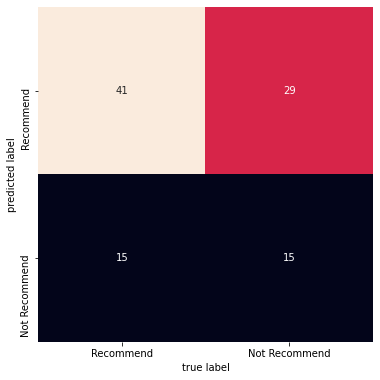

In [257]:
params, best_tree = param_search(tree, dtc_params, x_train, y_train)
predictions = best_tree.predict(x_test)
conf_matrix(y_test, predictions)

In [ ]:
params, best_tree = param_search(forest, rfc_params, x_train, y_train)
predictions = best_tree.predict(x_test)
conf_matrix(y_test, predictions)

## Preprocessing

In [27]:
data_prep = data.copy()

data_prep.drop(labels=["FabricType"], axis="columns", inplace=True)
data_prep.drop(labels=["Decoration"], axis="columns", inplace=True)

values = {"Price": "average",
          "Season": "summer",
          "NeckLine": "o-neck",
          "SleeveLength": "sleveless",
          "waiseline":"natural",
          "Material":"cotton",
          "Pattern Type":"solid"}
data_prep.fillna(value=values,inplace=True)


X_prep = data_prep.drop(["Recommendation", 'Dress_ID'],axis = 1)
y_prep = data_prep["Recommendation"]
X_prep = pd.get_dummies(X_prep)


x_train_prep, x_test_prep, y_train_prep, y_test_prep = train_test_split(X_prep, y_prep, test_size=0.2, random_state=1)

In [29]:
tree = DecisionTreeClassifier(random_state=1)
forest = RandomForestClassifier(random_state=1)

Значение гиперпараметра наилучшего классификатора:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2} 
Точность классификатора:  0.6225


0

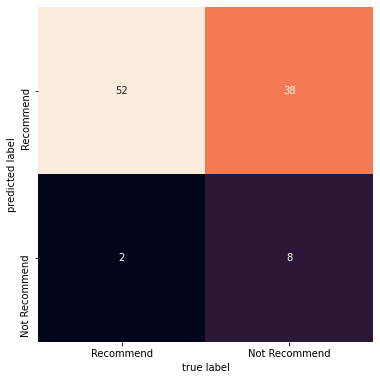

In [22]:
params, best_tree = param_search(tree, dtc_params, x_train_prep, y_train_prep)
predictions = best_tree.predict(x_test_prep)
conf_matrix(y_test_prep, predictions)

Значение гиперпараметра наилучшего классификатора:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100} 
Точность классификатора:  0.6525000000000001


0

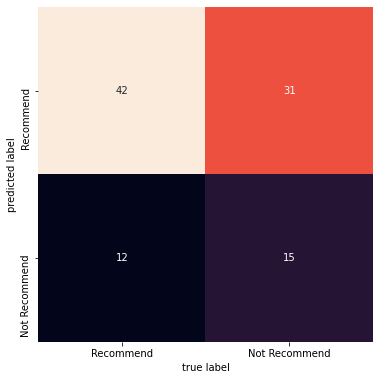

In [30]:
params, best_tree = param_search(forest, rfc_params, x_train_prep, y_train_prep)
predictions = best_tree.predict(x_test_prep)
conf_matrix(y_test_prep, predictions)